# 의사결정 트리 

# 6.1 Logistic Regression을 활용한 분류 

문제: 와인의 성분(설탕,알콜,산도)을 가지고 와인의 유형(레드,화이트 와인)을 판단하는 모델 학습 및 평가

### 6.1.2 데이터 가져오기

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
wine=pd.read_csv("https://bit.ly/wine_csv_data")

In [129]:
wine.shape

(6497, 4)

In [130]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [131]:
wine["class"].unique()

array([0., 1.])

In [132]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [133]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


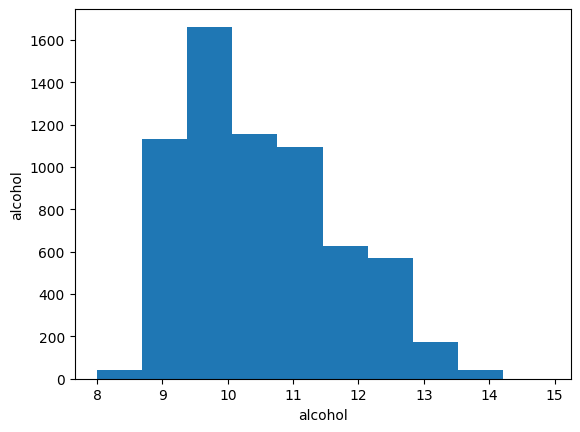

In [134]:
plt.hist(wine["alcohol"])
plt.xlabel("alcohol")
plt.ylabel("alcohol")
plt.show()

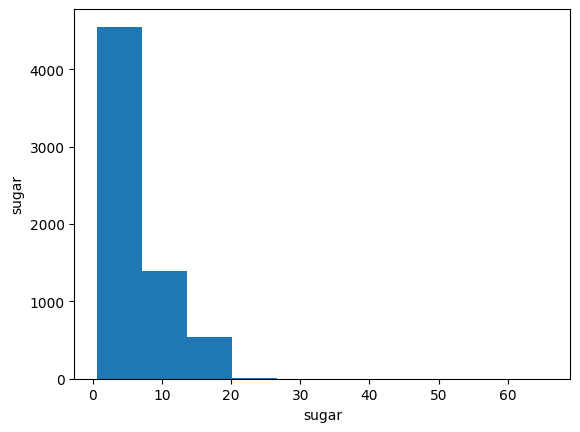

In [135]:
plt.hist(wine["sugar"])
plt.xlabel("sugar")
plt.ylabel("sugar")
plt.show()

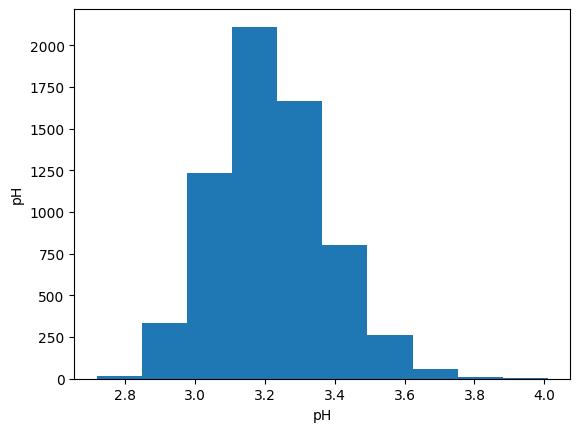

In [136]:
plt.hist(wine["pH"])
plt.xlabel("pH")
plt.ylabel("pH")
plt.show()

In [137]:
data=wine[["alcohol","sugar","pH"]].to_numpy()
target=wine["class"].to_numpy()


In [138]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =train_test_split(data, target, test_size=0.2, random_state=42)


In [139]:
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [140]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)


In [143]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled,train_target)

print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

print(lr.coef_,lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]
